# Data Science Job Salaries


---

*Our aim is to make an analysis by looking at the characteristics of those working in the field of data science.*

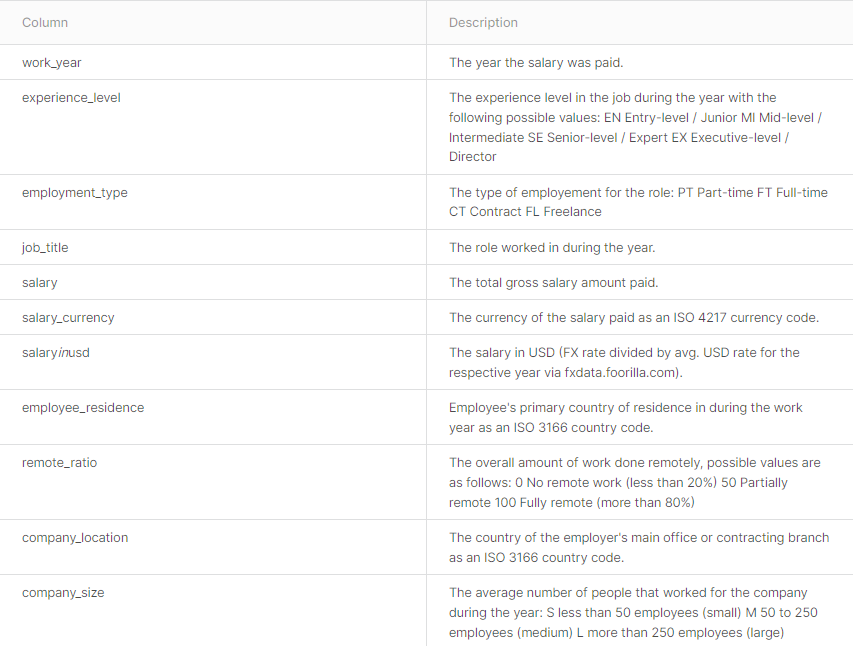

## Required Libraries

In [72]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import plotly.graph_objs as go
#function to get longitude and latitude data from country name
from geopy.geocoders import Nominatim

In [2]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#installation
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Installing Data

In [13]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [17]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [19]:
! kaggle datasets download -d ruchi798/data-science-job-salaries

  0% 0.00/7.37k [00:00<?, ?B/s]
100% 7.37k/7.37k [00:00<00:00, 12.5MB/s]


In [20]:
!unzip "/content/data-science-job-salaries.zip" -d "/content/data-science-job-salaries"

Archive:  /content/data-science-job-salaries.zip
  inflating: /content/data-science-job-salaries/ds_salaries.csv  


## Analize dataset

In [253]:
data = pd.read_csv("/content/data-science-job-salaries/ds_salaries.csv")
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


We can do index first column.

In [254]:
data.set_index(data.columns[0], inplace=True)

In [182]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
Unnamed: 0,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


We're look at all data info for **cloumns names,Non-Null Count,Dtype...**


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 56.9+ KB


We're look at the columns for being **Null** values exist or not.We can see it has not **Null** value.This is good foor analazing the data.

In [97]:
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

If we can look at the std to salary column or salary_in_usd columns,salary is not normal distrubition.

In [98]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


If we're look at the hist for work_year column,we can see last years increase data science recruitment.I think next years will increase more than last years.

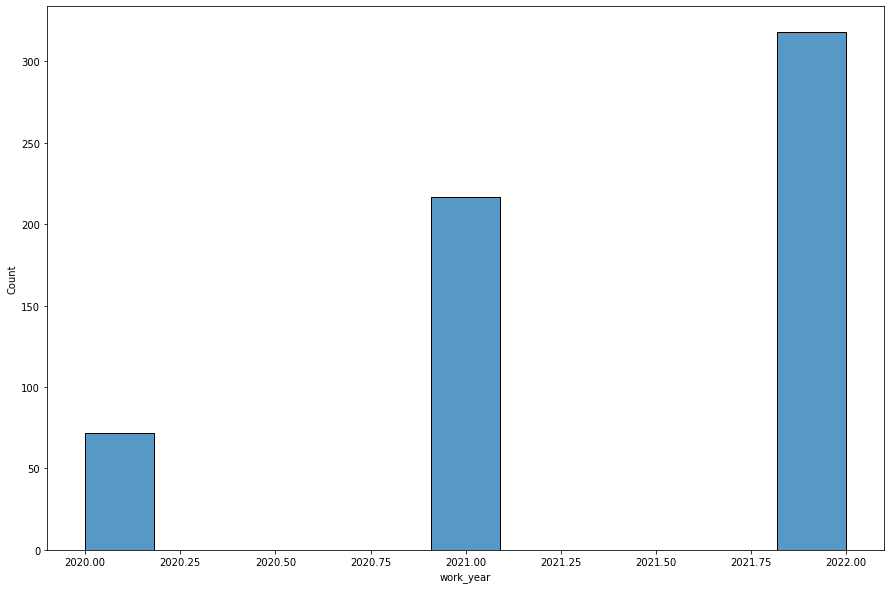

In [27]:
fig = plt.figure(figsize=(15,10))
sns.histplot(data, x="work_year")

We're seeing the salaries in usd by MI,EN and SE experience level for **Data Scientist**.

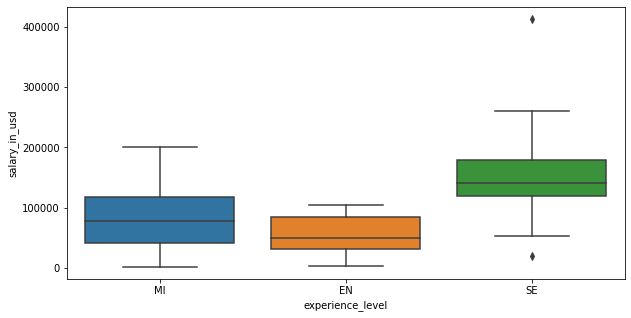

In [28]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x="experience_level", y="salary_in_usd", data=data[data["job_title"] == "Data Scientist"])

We're seeing the salaries in usd by MI,EN and SE experience level for **Machine Learning Engineer**.

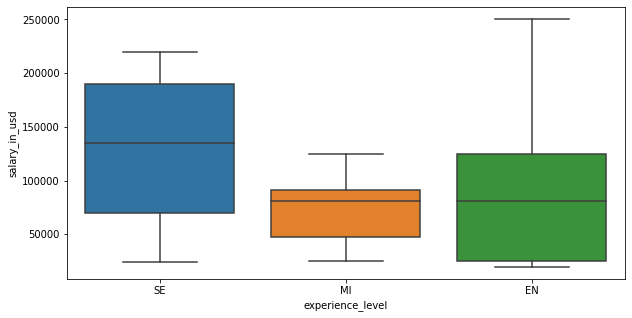

In [29]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x="experience_level", y="salary_in_usd", data=data[data["job_title"] == "Machine Learning Engineer"])

We're seeing the salaries in usd by small,medium and large company size for **Data Scientist**.

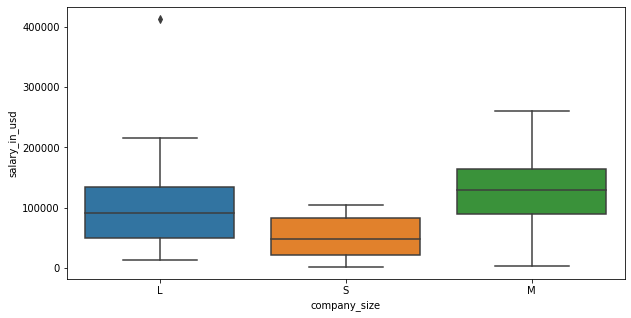

In [30]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(x="company_size", y="salary_in_usd", data=data[data["job_title"] == "Data Scientist"])

Let's look at the **10 jobs** with the highest average salary.

In [255]:
data.groupby(by=["job_title"]).mean()["salary"].sort_values(ascending=False)[:10]

job_title
Head of Machine Learning         6.000000e+06
ML Engineer                      2.676667e+06
BI Data Analyst                  1.902045e+06
Lead Data Scientist              1.101667e+06
Data Science Manager             1.062599e+06
Lead Data Analyst                5.690000e+05
Data Scientist                   5.083472e+05
Big Data Engineer                4.550000e+05
Data Analytics Lead              4.050000e+05
3D Computer Vision Researcher    4.000000e+05
Name: salary, dtype: float64

Let's find the full names of the countries to analyze on the map.

In [256]:
country_list = list(set(data["company_location"]))
country_list[:10]

['IN', 'GB', 'US', 'IE', 'HN', 'SI', 'DZ', 'ES', 'LU', 'MX']

In [257]:
countries = pd.DataFrame(country_list,columns=["country_short"])
countries.head()

,country_short
0,IN
1,GB
2,US
3,IE
4,HN


This part find country geocode and full name.

In [258]:
geolocator = Nominatim()

geolocate = []
latitude = []
longitude = []
for country in tqdm(country_list):
  try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country,language="en")
  except:
        # Return missing value
        loc =  np.nan
  geolocate.append(loc)
  
  try:
    latitude.append(loc[0])
    longitude.append(loc[1])
  except:
    latitude.append(np.nan)
    longitude.append(np.nan)

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning:

Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.

100%|██████████| 50/50 [00:24<00:00,  2.02it/s]


In [259]:
countries["country_name"] = latitude
countries["geolocate"] = longitude

In [260]:
countries[:10]

,country_short,country_name,geolocate
0,IN,India,"(22.3511148, 78.6677428)"
1,GB,United Kingdom,"(54.7023545, -3.2765753)"
2,US,United States,"(39.7837304, -100.445882)"
3,IE,Ireland,"(52.865196, -7.9794599)"
4,HN,Honduras,"(15.2572432, -86.0755145)"
5,SI,Slovenia,"(45.8133113, 14.4808369)"
6,DZ,Algeria,"(28.0000272, 2.9999825)"
7,ES,Spain,"(39.3260685, -4.8379791)"
8,LU,Luxembourg,"(49.8158683, 6.1296751)"
9,MX,Mexico,"(23.6585116, -102.0077097)"


In [261]:
comp_dict = {}
geolocate_dict = {}
lat_dict = {}
lon_dict = {}
for ind in range(len(countries)):
  comp_dict.update({countries["country_short"][ind]:countries["country_name"][ind]})
  geolocate_dict.update({countries["country_short"][ind]:countries["geolocate"][ind]})
  try:
    lat_dict.update({countries["country_short"][ind]:countries["geolocate"][ind][0]})
    lon_dict.update({countries["country_short"][ind]:countries["geolocate"][ind][1]})
  except:
    lat_dict.update({countries["country_short"][ind]:np.nan})
    lon_dict.update({countries["country_short"][ind]:np.nan})

Let's add these information to main dataframe.

In [262]:
data["lat"] = data["company_location"].map(lat_dict)
data["lon"] = data["company_location"].map(lon_dict)

In [263]:
data["company_name"] = data["company_location"].map(comp_dict)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,lat,lon,company_name
Unnamed: 0,,,,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,51.163818,10.447831,Germany
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,36.574844,139.239418,Japan
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,54.702354,-3.276575,United Kingdom
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,15.257243,-86.075514,Honduras
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,39.783730,-100.445882,United States


In [264]:
data["geolocate"] = data["company_location"].map(geolocate_dict)
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,lat,lon,company_name,geolocate
Unnamed: 0,,,,,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,51.163818,10.447831,Germany,"(51.1638175, 10.4478313)"
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,36.574844,139.239418,Japan,"(36.5748441, 139.2394179)"
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,54.702354,-3.276575,United Kingdom,"(54.7023545, -3.2765753)"
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,15.257243,-86.075514,Honduras,"(15.2572432, -86.0755145)"
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,39.783730,-100.445882,United States,"(39.7837304, -100.445882)"


In [265]:
data["company_name"] = data.loc[:, 'company_name'].replace('Türkiye', "Turkey")

In [266]:
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,lat,lon,company_name,geolocate
Unnamed: 0,,,,,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L,51.163818,10.447831,Germany,"(51.1638175, 10.4478313)"
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S,36.574844,139.239418,Japan,"(36.5748441, 139.2394179)"
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M,54.702354,-3.276575,United Kingdom,"(54.7023545, -3.2765753)"
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S,15.257243,-86.075514,Honduras,"(15.2572432, -86.0755145)"
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L,39.783730,-100.445882,United States,"(39.7837304, -100.445882)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M,39.783730,-100.445882,United States,"(39.7837304, -100.445882)"
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M,39.783730,-100.445882,United States,"(39.7837304, -100.445882)"
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M,39.783730,-100.445882,United States,"(39.7837304, -100.445882)"


We're find mean the salary in usd for analysis mean salary according to countries.

In [267]:
data_plot = data.groupby('company_name')[['salary_in_usd', 'salary']].mean()

In [268]:
data_plot["salary_in_usd"]

company_name
Algeria                    100000.000000
Australia                  108042.666667
Austria                     72920.750000
Belgium                     85699.000000
Brazil                      18602.666667
Bulgaria                    18053.000000
Canada                      99823.733333
Chile                       40038.000000
China                       71665.500000
Colombia                    21844.000000
Croatia                     45618.000000
Czechia                     50937.000000
Denmark                     54386.333333
Estonia                     32974.000000
France                      63970.666667
Germany                     81887.214286
Honduras                    20000.000000
Hungary                     35735.000000
Illinois, United States    119059.000000
India                       28581.750000
Iran                         4000.000000
Iraq                       100000.000000
Ireland                     71444.000000
Italy                       36366.500000
Jap

Now we can see the average salary of data science jobs in countries.

In [196]:
choropleth_map = go.Figure(
    data = {
        'type':'choropleth',
        'locations':list(data_plot.index),
        'locationmode':'country names',
        'colorscale':'Portland',
        'z':data_plot["salary_in_usd"],
        'colorbar':{'title':'World Population in 2020'},
        'marker': {
            'line': {
                'color':'rgb(255,255,255)',
                'width':2
            }
        }
    },     
    layout = {      
      'geo':{
          'scope':'world', 
      }  
    })
choropleth_map

In [197]:
choropleth_map = go.Figure(
    data = {
        'type':'choropleth',
        'locations':list(data_plot.index),
        'locationmode':'country names',        
        'colorscale':'Portland',         
        'z':data_plot["salary_in_usd"],
        'colorbar':{'title':'World Population in 2020'},
        'marker': {  
            'line': {
                'color':'rgb(255,255,255)',
                'width':2
            }
        }
    },
    layout = {
      'geo':{
          'projection':{
              'type':'orthographic'  # default is 'equirectangular'
          },
          'scope':'world',
      }
    })
choropleth_map

In [269]:
data_scientist = data[data["job_title"] == "Data Scientist"]
data_plot = data_scientist.groupby('company_name')[['salary_in_usd', 'salary']].mean()

In [199]:
choropleth_map = go.Figure(
    data = {
        'type':'choropleth',
        'locations':list(data_plot.index),
        'locationmode':'country names',
        'colorscale':'Portland',
        'z':data_plot["salary_in_usd"],
        'colorbar':{'title':'World Population in 2020'},
        'marker': {
            'line': {
                'color':'rgb(255,255,255)',
                'width':2
            }
        }
    },     
    layout = {      
      'geo':{
          'scope':'world', 
      }  
    })
choropleth_map

In [270]:
for col in ["work_year",'experience_level', 'employment_type', 'job_title', 'employee_residence',
       'company_location', 'company_size']:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes

In [271]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,lat,lon,company_name,geolocate
Unnamed: 0,,,,,,,,,,,,,,,
0,0,2,2,22,70000,EUR,79833,14,0,12,0,51.163818,10.447831,Germany,"(51.1638175, 10.4478313)"
1,0,3,2,41,260000,USD,260000,32,0,29,2,36.574844,139.239418,Japan,"(36.5748441, 139.2394179)"
2,0,3,2,7,85000,GBP,109024,20,50,18,1,54.702354,-3.276575,United Kingdom,"(54.7023545, -3.2765753)"
3,0,2,2,47,20000,USD,20000,23,0,20,2,15.257243,-86.075514,Honduras,"(15.2572432, -86.0755145)"
4,0,3,2,38,150000,USD,150000,55,50,48,0,39.783730,-100.445882,United States,"(39.7837304, -100.445882)"


We can see relationship between columns.

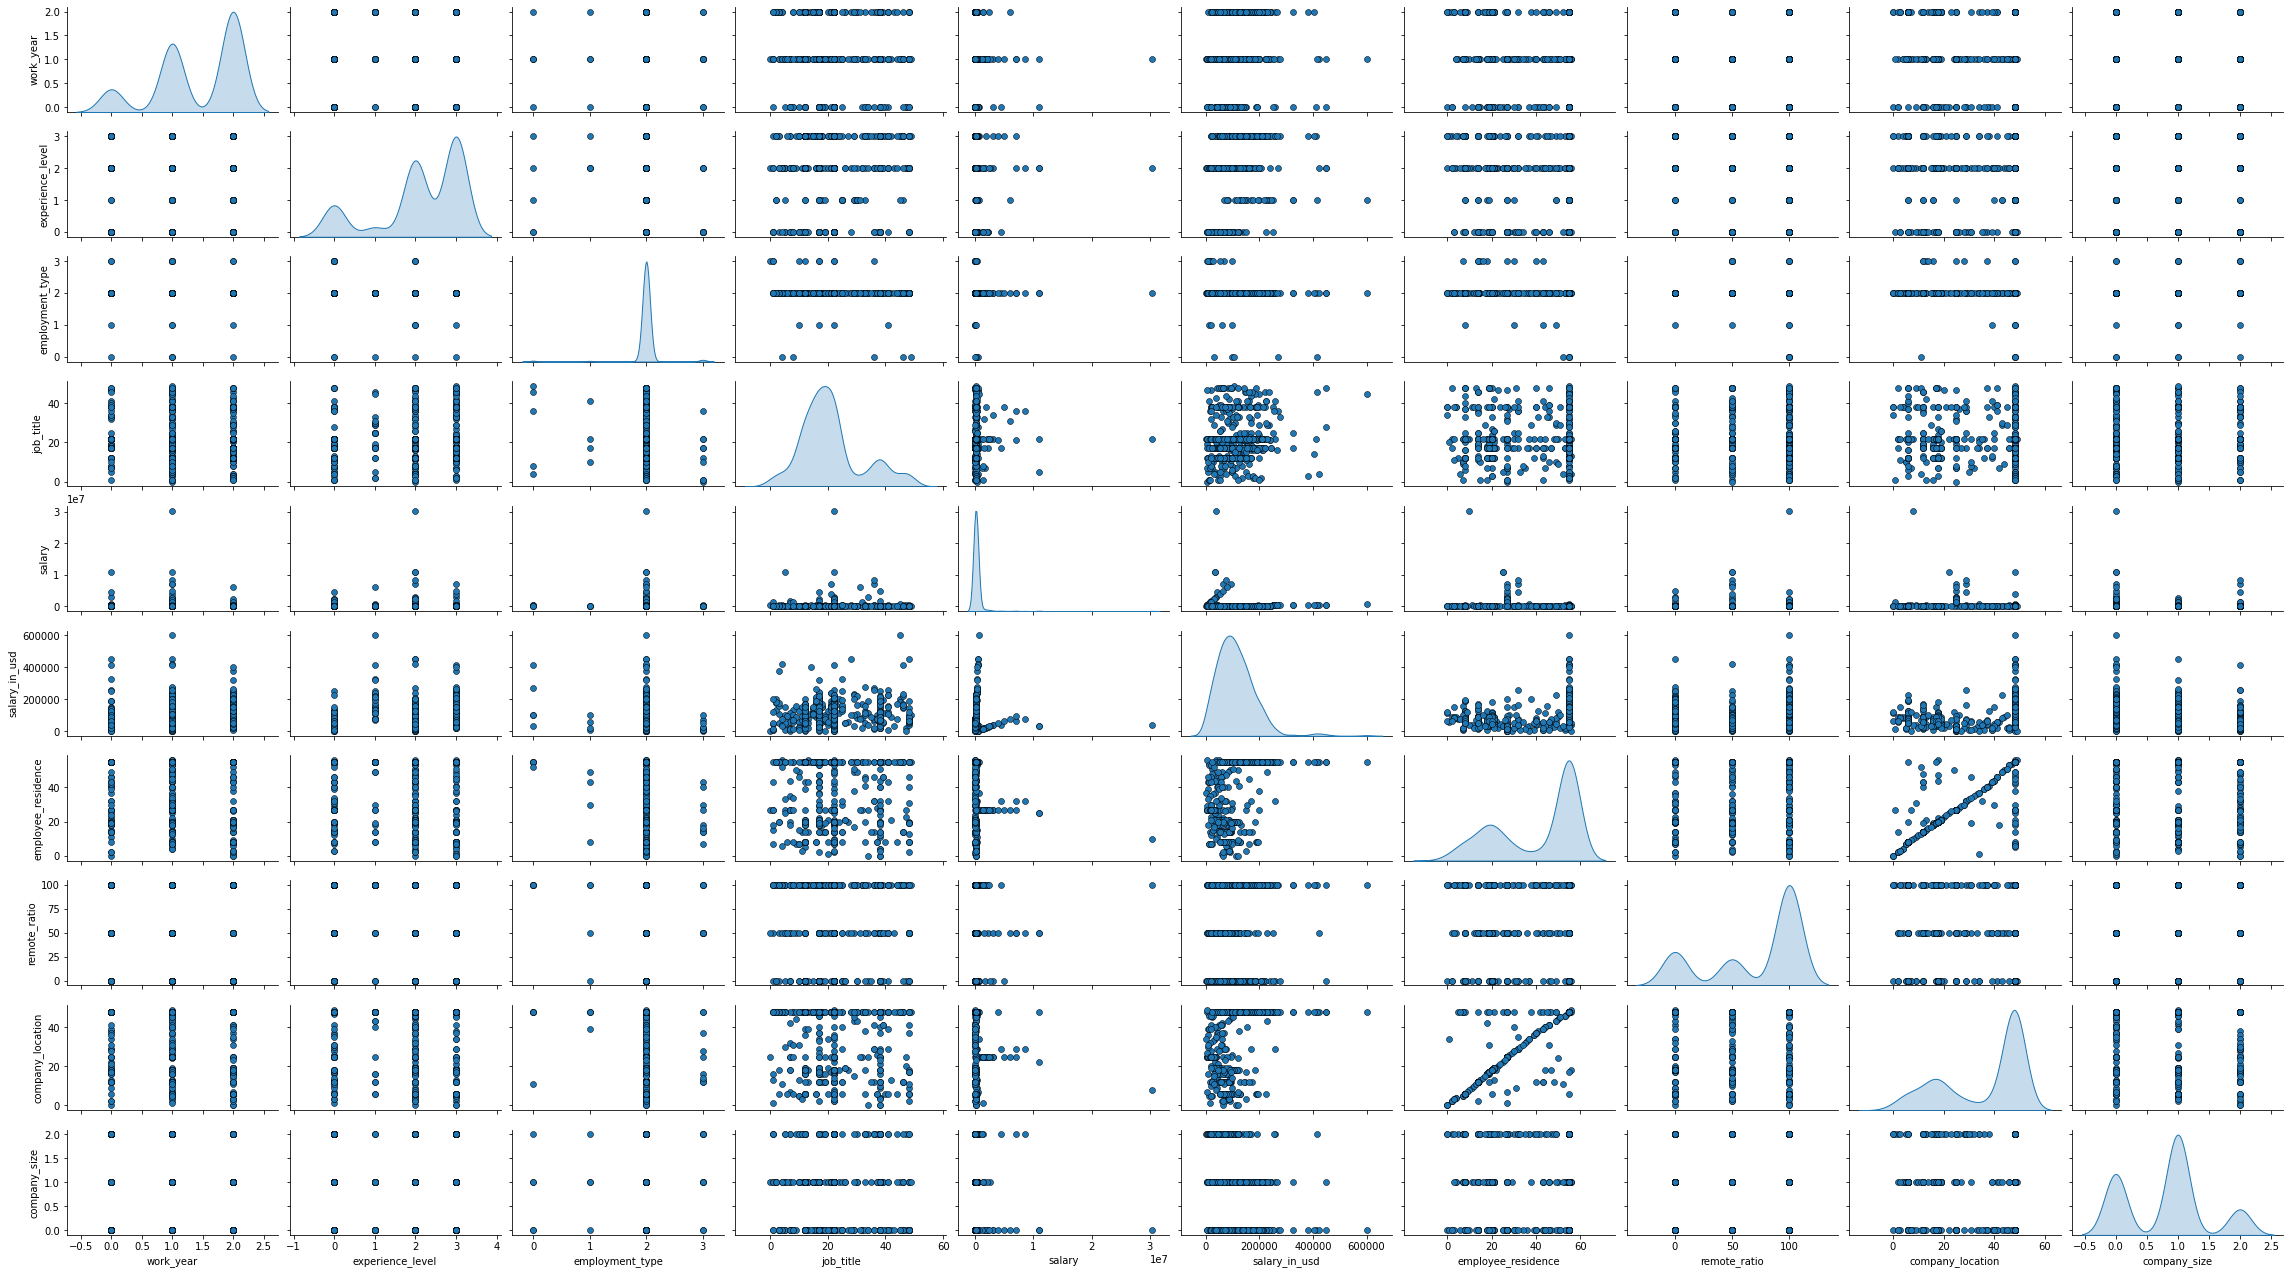

In [202]:
ozellikler = data.columns[:-4]
pp = sns.pairplot(data[ozellikler], height=1.8, aspect=1.8,plot_kws=dict(edgecolor="k", linewidth=0.5),diag_kind="kde", diag_kws=dict(shade=True))

In [203]:
corr = data.drop(['lat','lon','company_name','geolocate'], axis=1).corr(method ='pearson')
corr.style.background_gradient(cmap='coolwarm')

,work_year,experience_level,employment_type,job_title,salary,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
work_year,1.000000,0.300632,0.016323,-0.162560,-0.087577,0.170493,0.193552,0.076314,0.181515,0.078764
experience_level,0.300632,1.000000,-0.043715,0.020192,-0.023811,0.315312,0.226543,0.053628,0.247133,-0.066423
employment_type,0.016323,-0.043715,1.000000,-0.101823,0.000536,-0.123545,-0.109979,-0.045592,-0.083661,0.034549
job_title,-0.162560,0.020192,-0.101823,1.000000,0.027710,0.131016,-0.119135,-0.058589,-0.147379,-0.031011
salary,-0.087577,-0.023811,0.000536,0.027710,1.000000,-0.083906,-0.105638,-0.014608,-0.082894,-0.079959
salary_in_usd,0.170493,0.315312,-0.123545,0.131016,-0.083906,1.000000,0.452501,0.132122,0.428994,-0.151205
employee_residence,0.193552,0.226543,-0.109979,-0.119135,-0.105638,0.452501,1.000000,0.157299,0.897704,-0.081742
remote_ratio,0.076314,0.053628,-0.045592,-0.058589,-0.014608,0.132122,0.157299,1.000000,0.169083,0.022070
company_location,0.181515,0.247133,-0.083661,-0.147379,-0.082894,0.428994,0.897704,0.169083,1.000000,-0.066554
company_size,0.078764,-0.066423,0.034549,-0.031011,-0.079959,-0.151205,-0.081742,0.022070,-0.066554,1.000000


Which country you work in and what experience you have greatly affects your salary.

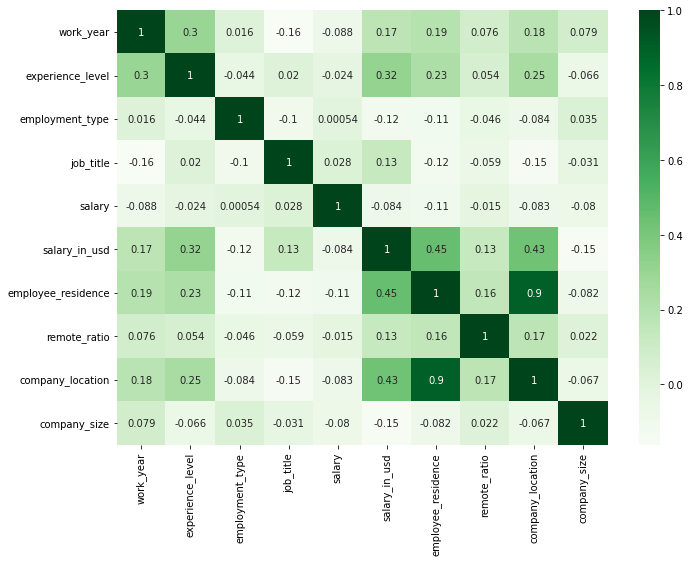

In [204]:
plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()